# Human, Economic Freedom Index & Political Freedom Datasets
## World Bank and Freedom House

About this file
The Economic Freedom Index is poised to help readers track over two decades of the advancement in economic freedom, prosperity, and opportunity and promote these ideas in their homes, schools, and communities. The Index covers 12 freedoms – from property rights to financial freedom – in 186 countries. The measurement of economic freedom is based on 12 quantitative and qualitative factors, grouped into four broad categories, or pillars, of economic freedom:

Rule of Law (property rights, government integrity, judicial
effectiveness)
Government Size (government spending, tax burden, fiscal health)
Regulatory Efficiency (business freedom, labor freedom, monetary
freedom)
Open Markets (trade freedom, investment freedom, financial
freedom)

Sources: Kaggle 
https://www.kaggle.com/gsutters/the-human-freedom-index?select=hfi_cc_2019.csv
https://www.kaggle.com/lewisduncan93/the-economic-freedom-index 

In [ ]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from matplotlib.patches import Ellipse
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


from sklearn import metrics

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture
import time

In [4]:
fh_file = '/Users/mehrunisaqayyum/Downloads/index 3.csv'
freedom_df = pd.read_csv(fh_file)
freedom_df

,Country,2001 Legal Score,2001 Political Score,2001 Economic Score,2001 Score,2001 Status,2002 Legal Score,2002 Political Score,2002 Economic Score,2002 Score,...,2014 Legal Score,2014 Political Score,2014 Economic Score,2014 Score,2014 Status,2015 Legal Score,2015 Political Score,2015 Economic Score,2015 Score,2015 Status
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,24.0,30.0,20.0,74.0,...,20.0,28.0,19.0,67.0,NF,18.0,26.0,18.0,62.0,NF
1,Albania,24.0,12.0,12.0,48.0,PF,20.0,18.0,12.0,50.0,...,15.0,17.0,17.0,49.0,PF,15.0,18.0,18.0,51.0,PF
2,Algeria,21.0,26.0,15.0,62.0,NF,21.0,24.0,17.0,62.0,...,21.0,23.0,17.0,61.0,NF,22.0,23.0,17.0,62.0,NF
3,Andorra,NaN,NaN,NaN,NaN,NaN,1.0,1.0,6.0,8.0,...,1.0,4.0,8.0,13.0,F,1.0,4.0,8.0,13.0,F
4,Angola,21.0,33.0,25.0,79.0,NF,20.0,30.0,22.0,72.0,...,19.0,30.0,21.0,70.0,NF,20.0,30.0,21.0,71.0,NF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,"Yemen, North",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206,"Yemen, South",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207,Yugoslavia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208,Zambia,22.0,24.0,19.0,65.0,NF,20.0,24.0,19.0,63.0,...,18.0,25.0,19.0,62.0,NF,19.0,23.0,19.0,61.0,NF


In [5]:
from pandas_profiling import ProfileReport
ProfileReport(freedom_df)

/opt/anaconda3/lib/python3.7/site-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,76
Number of observations,210
Total Missing (%),1.8%
Total size in memory,124.8 KiB
Average record size in memory,608.6 B
Numeric,3
Categorical,15
Boolean,0
Date,0
Text (Unique),1
Rejected,57


In [ ]:
econ_file = '/Users/mehrunisaqayyum/Downloads/datasets_127094_304788_economic_freedom_index2019_data.csv'
#econ_df = pd.read_csv(econ_file,encoding="utf-8")
econ_df = pd.read_csv(econ_file,encoding="ISO-8859-1")
econ_df

In [13]:
econ_df.columns

Index(['CountryID', 'Country Name', 'WEBNAME', 'Region', 'World Rank',
       'Region Rank', '2019 Score', 'Property Rights', 'Judical Effectiveness',
       'Government Integrity', 'Tax Burden', 'Gov't Spending', 'Fiscal Health',
       'Business Freedom', 'Labor Freedom', 'Monetary Freedom',
       'Trade Freedom', 'Investment Freedom ', 'Financial Freedom',
       'Tariff Rate (%)', 'Income Tax Rate (%)', 'Corporate Tax Rate (%)',
       'Tax Burden % of GDP', 'Gov't Expenditure % of GDP ', 'Country',
       'Population (Millions)', 'GDP (Billions, PPP)', 'GDP Growth Rate (%)',
       '5 Year GDP Growth Rate (%)', 'GDP per Capita (PPP)',
       'Unemployment (%)', 'Inflation (%)', 'FDI Inflow (Millions)',
       'Public Debt (% of GDP)'],
      dtype='object')

# Human Freedom

In [ ]:
#datasets_93172_883723_hfi_cc_2019.csv

human_file = '/Users/mehrunisaqayyum/Downloads/datasets_93172_883723_hfi_cc_2019.csv' 
human_df = pd.read_csv(human_file)
human_df

In [ ]:
ProfileReport(human_df)

In [100]:
human_df.iloc[:,108].value_counts()

10    914
0     237
3     203
1     127
-      81
5      58
Name: ef_regulation_labor_conscription, dtype: int64

In [140]:
pd.Series([1,2,float('nan'),3]).median()

2.0

In [19]:
human_df.columns.tolist()
#another way is to print(df.columns)

['year',
 'ISO_code',
 'countries',
 'region',
 'hf_score',
 'hf_rank',
 'hf_quartile',
 'pf_rol_procedural',
 'pf_rol_civil',
 'pf_rol_criminal',
 'pf_rol',
 'pf_ss_homicide',
 'pf_ss_disappearances_disap',
 'pf_ss_disappearances_violent',
 'pf_ss_disappearances_organized',
 'pf_ss_disappearances_fatalities',
 'pf_ss_disappearances_injuries',
 'pf_ss_disappearances',
 'pf_ss_women_fgm',
 'pf_ss_women_inheritance_widows',
 'pf_ss_women_inheritance_daughters',
 'pf_ss_women_inheritance',
 'pf_ss_women',
 'pf_ss',
 'pf_movement_domestic',
 'pf_movement_foreign',
 'pf_movement_women',
 'pf_movement',
 'pf_religion_estop_establish',
 'pf_religion_estop_operate',
 'pf_religion_estop',
 'pf_religion_harassment',
 'pf_religion_restrictions',
 'pf_religion',
 'pf_association_association',
 'pf_association_assembly',
 'pf_association_political_establish',
 'pf_association_political_operate',
 'pf_association_political',
 'pf_association_prof_establish',
 'pf_association_prof_operate',
 'pf_asso

In [75]:
human_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1620 entries, 0 to 1619
Columns: 120 entries, year to ef_rank
dtypes: int64(1), object(119)
memory usage: 1.5+ MB


# Data Cleaning

In [21]:
human_df.shape

(1620, 120)

### Observation
There are 1,620 observations and 120 indices/features. 

In [105]:
from collections import Counter
big_list_of_strings = []

human_df.applymap(lambda x: big_list_of_strings.append(x) if type(x) == str else None)

c = Counter(big_list_of_strings)


In [106]:
c

Counter({'ALB': 10,
         'DZA': 10,
         'AGO': 10,
         'ARG': 10,
         'ARM': 10,
         'AUS': 10,
         'AUT': 10,
         'AZE': 10,
         'BHS': 10,
         'BHR': 10,
         'BGD': 10,
         'BRD': 10,
         'BLR': 10,
         'BEL': 10,
         'BLZ': 10,
         'BEN': 10,
         'BTN': 10,
         'BOL': 10,
         'BIH': 10,
         'BWA': 10,
         'BRA': 10,
         'BRN': 10,
         'BGR': 10,
         'BFA': 10,
         'BDI': 10,
         'KHM': 10,
         'CMR': 10,
         'CAN': 10,
         'CPV': 10,
         'CAF': 10,
         'TCD': 10,
         'CHL': 10,
         'CHN': 10,
         'COL': 10,
         'COD': 10,
         'COG': 10,
         'CRI': 10,
         'CIV': 10,
         'HRV': 10,
         'CYP': 10,
         'CZE': 10,
         'DNK': 10,
         'DOM': 10,
         'ECU': 10,
         'EGY': 10,
         'SLV': 10,
         'EST': 10,
         'SWZ': 10,
         'ETH': 10,
         'FJI': 10,


In [144]:
#We used this on Saturday May 30th: DON'T USE!!!!
# ```
# for x in range(5,119):
#     #human_df.iloc[:,x] = human_df.iloc[:,x].replace({'-': np.nan})
#     human_df.iloc[:,x] = pd.to_numeric(human_df.iloc[:,x], errors='coerce')
#     human_df.iloc[:,x].fillna(human_df.iloc[:,x].dropna().median())
# ```
#     #human_df.iloc[:,x].replace('-').astype(float)
#     #human_df.iloc[:,x].fillna(human_df.iloc[:,x].median())

In [ ]:
#NEW CODE
for x in range(5,119):
    #human_df.iloc[:,x] = human_df.iloc[:,x].replace({'-': np.nan})
    human_df.iloc[:,x] = pd.to_numeric(human_df.iloc[:,x], errors='coerce')
    human_df.iloc[:,x] = human_df.iloc[:,x].fillna(human_df.iloc[:,x].dropna().median())

#Dropping the Nans, then filling them in w/the median

In [ ]:
human_df.shape == human_df.dropna().shape
#It's fixed

In [111]:
print(human_df.median())

year                                 2012.50
hf_rank                                77.00
hf_quartile                             2.00
pf_rol_procedural                       5.20
pf_rol_civil                            5.30
                                      ...   
ef_regulation_business_licensing        8.15
ef_regulation_business_compliance       7.50
ef_regulation_business                  6.30
ef_regulation                           7.10
ef_score                                6.88
Length: 115, dtype: float64


#Fill in - missing value with Median through Imputing
#We see in column 108 that there's another string value. We need to replace and fill by imputing with median.
human_df.iloc[:,5]

for x in range(5,119):
    temp = human_df.iloc[:,x].replace({'-': np.nan})
    temp.fillna(temp.dropna().median())
    #human_df.iloc[:,x].replace('-').astype(float)
    #human_df.iloc[:,x].fillna(human_df.iloc[:,x].median())
print(temp.dropna().median())

In [156]:
#help to identify what was dropped
human_df.dropna(axis='columns').shape

(1620, 108)

In [157]:
set(human_df.columns)-set(human_df.dropna(axis='columns'))

{'ef_regulation',
 'ef_regulation_business',
 'ef_regulation_business_adm',
 'ef_regulation_business_bribes',
 'ef_regulation_business_bureaucracy',
 'ef_regulation_business_compliance',
 'ef_regulation_business_licensing',
 'ef_regulation_business_start',
 'ef_regulation_labor',
 'ef_regulation_labor_conscription',
 'ef_regulation_labor_dismissal',
 'ef_score'}

In [159]:
human_df.ef_regulation.isna().value_counts()
#There are 80 NaNs in these dropped columns

False    1540
True       80
Name: ef_regulation, dtype: int64

In [160]:
human_df.columns.tolist()[118:]

['ef_score', 'ef_rank']

In [148]:
human_df.shape == human_df.dropna().shape

False

In [150]:
human_df.shape

(1620, 120)

In [151]:
human_df.dropna().shape

(1372, 120)

In [63]:
#Unique values
human_df['ef_trade_tariffs'].value_counts()

8.3     130
8.2     114
8.4      96
-        86
8        63
       ... 
3.7       1
4.2       1
9.59      1
3.5       1
4         1
Name: ef_trade_tariffs, Length: 68, dtype: int64

In [163]:
#Drop labels that have string values
#X = human_df.drop(['year','countries','region','ISO_code',], axis=1)
#Can select the same columns we converted into numeric to serve as the 'X'
X = human_df.iloc[:,5:119]

## Standardize Data
### Need to standardize each variable because it is a common practice before applying k-means clustering.

In [164]:
#Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
print (X_std)

[[-0.90364591 -1.3366973   0.78802579 ...  0.30646664  0.80284477
   0.98716819]
 [ 1.77687189  1.39975969 -0.10628706 ... -0.53226018 -1.6419081
  -2.29312842]
 [ 1.68523025  1.39975969 -0.10628706 ... -1.20324163 -1.33631399
  -2.22526022]
 ...
 [-1.70551021 -1.3366973  -0.10628706 ...  1.48068418  1.51589769
   1.75634119]
 [-1.72842062 -1.3366973   1.98044292 ...  1.31293882  1.8214918
   1.88076623]
 [-1.75133102 -1.3366973   1.50347607 ...  1.81617491  2.33081532
   2.61600513]]


In [167]:
X_std.shape

(1620, 114)

# Data Exploration - Visualization

## Dimensionality Reduction: 
### Principal Component Analysis (PCA)
Before applying PCA, we should always mean normalize our variables. That is, for each variable we have, we calculate the mean and subtract that mean from every observation of that variable. This makes our variables have mean zero. However, our features use the same scale for scoring. So we don't need to mean normalize beforehand. We may proceed to PCA. 

#identify labels that have 'ef_trade' to use in X
list_of_columns_to_include = [x for x in human_df.columns if 'ef_trade' in x]
list_of_columns_to_include

In [99]:
#X = human_df['ef_regulation_credit_ownership',
  
X = human_df.iloc[:,5:119]
#y = human_df[]

print(X.shape)
#We have 1,620 observations and 13 features?

(1620, 13)


In [191]:
pca = PCA(n_components=2, svd_solver='full')
pca.fit(X)
result = pca.transform(X)
print(pca.explained_variance_ratio_)

print(pca.singular_values_)

[0.88862278 0.02877573]
[2499.33670702  449.75835352]


In [187]:
#Let us see the result of the PCA
result

array([[ -51.15928034,   -5.73108876],
       [ 105.22091145,    5.91127011],
       [  84.7835674 ,   18.51715835],
       ...,
       [-104.68201775,   -4.18181555],
       [-107.20093592,   -3.80891081],
       [-101.89745994,  -12.0758482 ]])

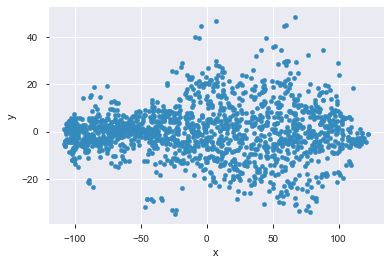

In [192]:
#Data reduction features look like this 
pd.DataFrame(result, columns=['x','y']).plot(kind='scatter', x='x', y='y')

In [181]:
# We just want the first two principal components
pca = PCA(n_components=2)

# We get the components by 
# calling fit_transform method with our data
pca_components = pca.fit_transform(X)

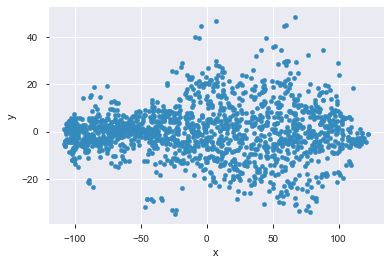

In [211]:
#Try Tiago's way

pd.DataFrame(result, columns=['x','y']).plot(kind='scatter', x='x', y='y')

## Dimensionality Reduction:
### t-Distributed Stochastic Neighbor Embedding (or in short t-SNE)

In [194]:
#Method 2
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1620 samples in 0.014s...
[t-SNE] Computed neighbors for 1620 samples in 0.627s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1620
[t-SNE] Computed conditional probabilities for sample 1620 / 1620
[t-SNE] Mean sigma: 8.721429
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.837818
[t-SNE] KL divergence after 300 iterations: 0.864244
t-SNE done! Time elapsed: 10.948623895645142 seconds


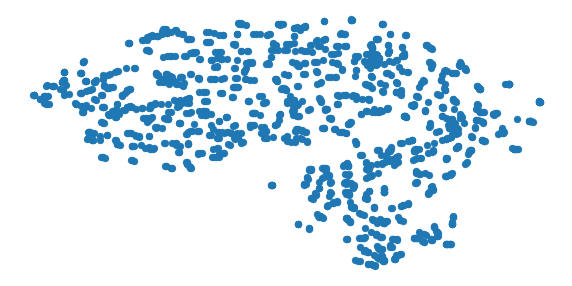

In [196]:
plt.figure(figsize=(10,5))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

## Dimensionality Reduction:
### UMAP

In [213]:
!pip install umap-learn
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.datasets import fetch_openml
import umap

  Using cached https://files.pythonhosted.org/packages/12/df/381fbef08de2c27a885c7531d3876416622e00c7bb5a5872eed022109f92/numba-0.49.1-cp37-cp37m-macosx_10_14_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/0c/83/8dd472cca2d2733813078aeb601b99674c559b2d032dfa34e2599b77ba57/llvmlite-0.32.1-cp37-cp37m-macosx_10_9_x86_64.whl
  Found existing installation: llvmlite 0.29.0
ERROR: Cannot uninstall 'llvmlite'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


ModuleNotFoundError: No module named 'umap'

In [208]:
time_start = time.time()

umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(result)

print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

NameError: name 'umap' is not defined

## Clustering:
### K-Means
We will propose five clusters to organize the features. Given the label names, we suspect that the themes suggest grouping in the areas of "economics", "political", "civic engagement", "business", and "legal issues". We will input our standardized variables (X_std) to run through the models.

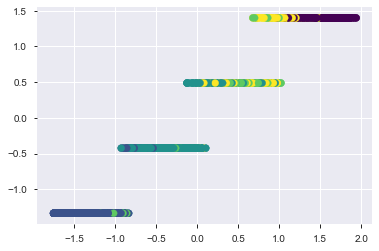

In [201]:
k_means = KMeans(n_clusters=5, random_state=123)
k_means.fit(X_std)
y_pred = k_means.predict(X_std)

# Plot the solution. 1,620 values
plt.scatter(X_std[:,0], X_std[:,1], c=y_pred,cmap='viridis')
plt.show()

In [206]:
#Best way to visualize clusters based on each y-prediction
import hvplot.pandas

df_for_plotting = pd.DataFrame(result, columns=['x','y'])
df_for_plotting['pf_rol_civil']  = human_df['pf_rol_criminal']
df_for_plotting['y_pred'] = y_pred
df_for_plotting.hvplot(kind='scatter', x='x', y='y', by='y_pred')

:NdOverlay   [y_pred]
   :Scatter   [x]   (y)

In [169]:
X_std[:,0].shape

(1620,)

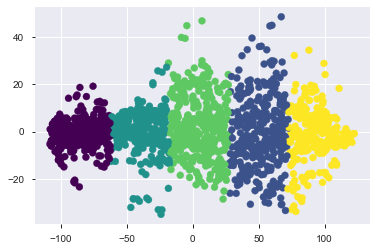

In [199]:
k_means = KMeans(n_clusters=5, random_state=123)
k_means.fit(result)
y_pred = k_means.predict(result)

# Plot the solution. 1,620 values
plt.scatter(result[:,0], result[:,1], c=y_pred,cmap='viridis') #color paremeter
plt.show()

## Clustering:
### MiniBatch

The slowest run took 4.77 times longer than the fastest. This could mean that an intermediate result is being cached.
66.2 ms ± 43.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


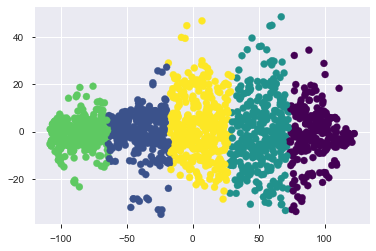

In [200]:
mini_batch_k_means = MiniBatchKMeans(n_clusters=5, random_state=123)
%timeit mini_batch_k_means.fit(result)
y_pred_mini = mini_batch_k_means.predict(result)

# Plot the solution.
plt.scatter(result[:,0], result[:,1], c=y_pred_mini,cmap='viridis')
plt.show()

## Clustering:
### Hierarchical Clustering

In [210]:
# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage='complete', 
                                      affinity='cosine',
                                      n_clusters=3)

# Fit model
clusters = agg_cluster.fit_predict(result)

In [218]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

KeyError: 0

<Figure size 720x360 with 0 Axes>

In [215]:
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=3, random_state=123)

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

In [216]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

KeyError: 0

<Figure size 720x360 with 0 Axes>

In [ ]:
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=3, random_state=123)

# Fit model
clusters = gmm_cluster.fit_predict(result)

In [ ]:
pca = PCA(n_components=2).fit_transform(result)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [ ]:
print("Adjusted Rand Index of the GMM solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhoutte score of the GMM solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

## Summary: 
In each of the tasks above, try alternative methods and select a best performing one. Discuss how dimensionality reduction and clustering algorithms enable you to gain insights regarding the data. 
~PCA is an easy to use and useful dimensionality reduction algorithm which preserves the dissimilarities in the data. However, PCA is relatively weak in retaining the local similarities in the low-dimensional representation.